In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.special import expit

#### Playground

Player safe with question low information ---> Prob to answer risky = 0.46
Player safe with question medium information ---> Prob to answer risky = 0.30
Player safe with question high information ---> Prob to answer risky = 0.14

Player random with question low information ---> Prob to answer risky = 0.50
Player random with question medium information ---> Prob to answer risky = 0.50
Player random with question high information ---> Prob to answer risky = 0.50

Player risky with question low information ---> Prob to answer risky = 0.54
Player risky with question medium information ---> Prob to answer risky = 0.70
Player risky with question high information ---> Prob to answer risky = 0.86



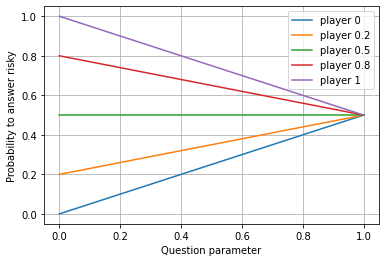

In [ ]:
# Mode == Weights

player = [0.1, 0.5, 0.9]
player_label = ['safe', 'random', 'risky']

question = [0.9, 0.5, 0.1]
question_label = ['low information', 'medium information', 'high information']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = p * (1-q) + 0.5 * q
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

# Visualization 

player = [0, 0.2, 0.5, 0.8, 1]

question = np.linspace(0,1,100)

for i,p in enumerate(player):
  y = p * (1-question) + 0.5 * question
  plt.plot(question, y, label=f'player {p}')
plt.xlabel('Question parameter')
plt.ylabel('Probability to answer risky')
plt.grid(True)
plt.legend()
plt.show()

Player safe with question high risk bias ---> Prob to answer risky = 0.50
Player safe with question medium risk bias ---> Prob to answer risky = 0.40
Player safe with question low risk bias ---> Prob to answer risky = 0.31

Player random with question high risk bias ---> Prob to answer risky = 0.60
Player random with question medium risk bias ---> Prob to answer risky = 0.50
Player random with question low risk bias ---> Prob to answer risky = 0.40

Player risky with question high risk bias ---> Prob to answer risky = 0.69
Player risky with question medium risk bias ---> Prob to answer risky = 0.60
Player risky with question low risk bias ---> Prob to answer risky = 0.50



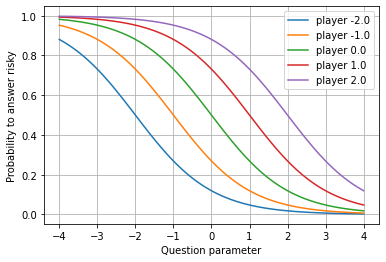

In [ ]:
# Mode == Rasch

player = [0.1, 0.5, 0.9]
player_label = ['safe', 'random', 'risky']

question = [0.1, 0.5, 0.9]
question_label = ['high risk bias', 'medium risk bias', 'low risk bias']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = 1/(1+math.exp(q-p))
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

# Visualization -> Mode == Rasch

player = np.linspace(-2, 2, 5)

question = np.linspace(-4,4,100)

for i,p in enumerate(player):
  y = 1/(1+np.exp(question-p))
  plt.plot(question, y, label=f'player {p}')
plt.xlabel('Question parameter')
plt.ylabel('Probability to answer risky')
plt.grid(True)
plt.legend()
plt.show()

Player safe with question low information ---> Prob to answer risky = 0.40
Player safe with question medium information ---> Prob to answer risky = 0.25
Player safe with question high information ---> Prob to answer risky = 0.14

Player random with question low information ---> Prob to answer risky = 0.50
Player random with question medium information ---> Prob to answer risky = 0.50
Player random with question high information ---> Prob to answer risky = 0.50

Player risky with question low information ---> Prob to answer risky = 0.60
Player risky with question medium information ---> Prob to answer risky = 0.75
Player risky with question high information ---> Prob to answer risky = 0.86

a = -5.0


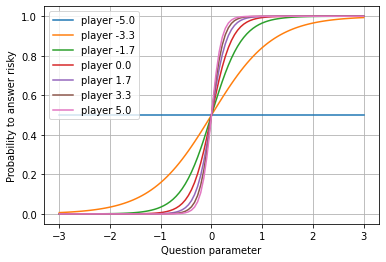

a = -3.333333333333333


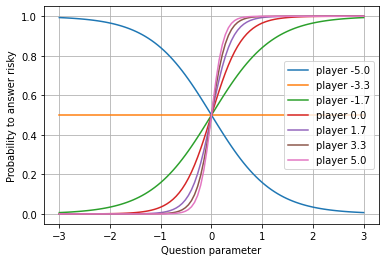

a = -1.6666666666666665


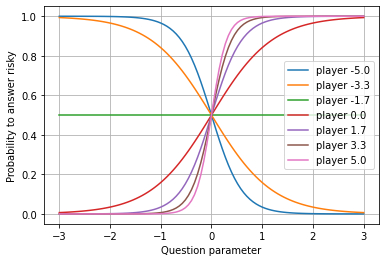

a = 0.0


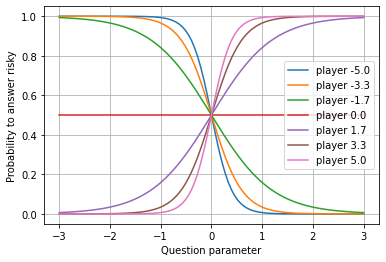

a = 1.666666666666667


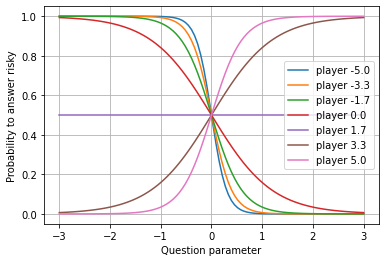

a = 3.333333333333334


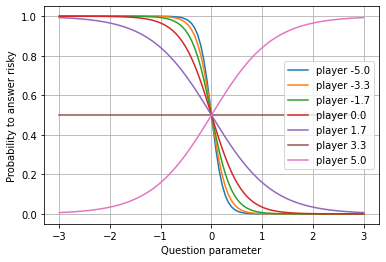

a = 5.0


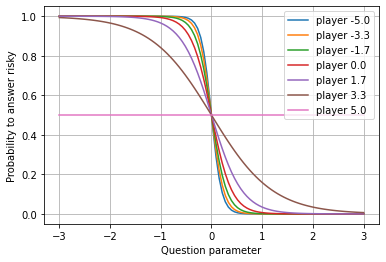

In [ ]:
# Mode == 2PL_modified (testing)

player = [-2, 0, 2]
player_label = ['safe', 'random', 'risky']

question = [0.2, 0.55, 0.9]
question_label = ['low information', 'medium information', 'high information']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = 1/(1+math.exp(-p*q))
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

# Visualization 

player = np.linspace(-5, 5, 7)

question = np.linspace(-3,3,100)
asss= np.linspace(-5, 5, 7)

for a in asss:
  print(f'a = {a}')
  for i,p in enumerate(player):
    y = 1/(1+np.exp(question*a-question*p))
    plt.plot(question, y, label=f'player {p:.1f}')
  plt.xlabel('Question parameter')
  plt.ylabel('Probability to answer risky')
  plt.grid(True)
  plt.legend()
  plt.show()

Player safe with question low information ---> Prob to answer risky = 0.40
Player safe with question medium information ---> Prob to answer risky = 0.25
Player safe with question high information ---> Prob to answer risky = 0.14

Player random with question low information ---> Prob to answer risky = 0.50
Player random with question medium information ---> Prob to answer risky = 0.50
Player random with question high information ---> Prob to answer risky = 0.50

Player risky with question low information ---> Prob to answer risky = 0.60
Player risky with question medium information ---> Prob to answer risky = 0.75
Player risky with question high information ---> Prob to answer risky = 0.86



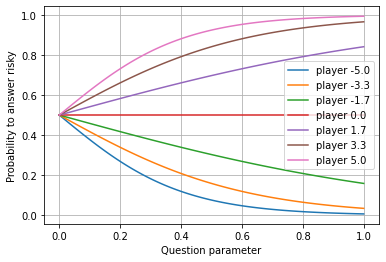

In [ ]:
# Mode == 2PL_modified

player = [-2, 0, 2]
player_label = ['safe', 'random', 'risky']

question = [0.2, 0.55, 0.9]
question_label = ['low information', 'medium information', 'high information']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = 1/(1+math.exp(-p*q))
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

# Visualization 

player = np.linspace(-5, 5, 7)

question = np.linspace(0,1,100)

for i,p in enumerate(player):
  y = 1/(1+np.exp(-question*p))
  plt.plot(question, y, label=f'player {p:.1f}')
plt.xlabel('Question parameter')
plt.ylabel('Probability to answer risky')
plt.grid(True)
plt.legend()
plt.show()

c = 0.0


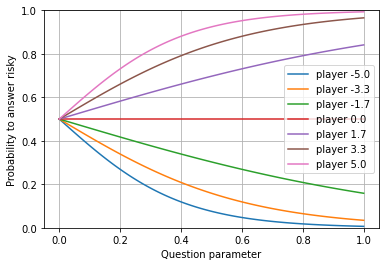

c = 0.225


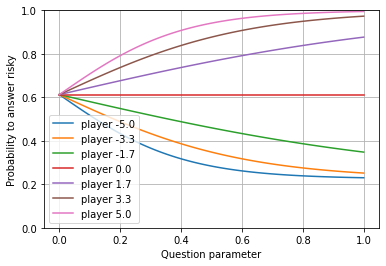

c = 0.45


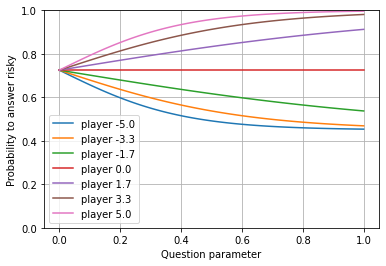

c = 0.675


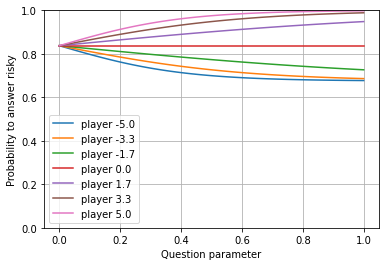

c = 0.9


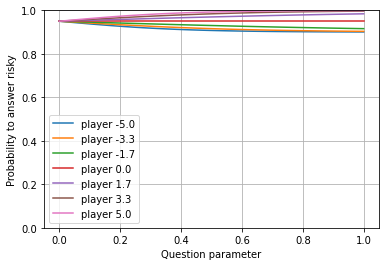

In [ ]:
# Mode == 3PL

# Visualization 

player = np.linspace(-5, 5, 7)

question = np.linspace(0,1,100)

cs = np.linspace (0,0.9,5) 

for c in cs:
  for i,p in enumerate(player):
    y = c+((1-c)/(1+np.exp(-question*p)))
    plt.plot(question, y, label=f'player {p:.1f}')
  plt.xlabel('Question parameter')
  plt.ylabel('Probability to answer risky')
  plt.ylim(0,1)
  plt.grid(True)
  plt.legend()
  print(f'c = {c}')
  plt.show()

## Simulator

In [ ]:
### Inputs 

n_players = 500
prevalence_profiles = [0.3, 0.2, 0.5]  # Must add to 1
profiles_dict = {'risky' : 1.5,
                 'random': 0,
                 'safe'  : -1.5}

n_questions = 15
questions_output = {'risky_answer': 1,
                    'safe_answer' : 0}
low_limit_question = 0.2
high_limit_question = 1



### Players

class Player:
  def __init__(self, profile='random'):
    self.profile = profile
    self.risk_prob = profiles_dict.get(profile)

  def play_game(self, game, mode='2PL_modified'):
    answers_player = []
    for question in game.difficulty_questions:
      if mode == 'weights':
        # Prob. to answer risky = p(i) * (1-W(j)) + 0.5 * W(j)
        prob_answer_risky = self.risk_prob * (1-question) + 0.5 * question
      elif mode == 'rasch':
        # Prob. to answer risky = 1 / 1+e^(Q-P)
        prob_answer_risky = 1/(1 + math.exp(question - self.risk_prob))
      elif mode == '2PL_modified':
        # Prob. to answer risky = 1 / 1+e^(-P*Q)
        prob_answer_risky = 1/(1 + math.exp(-self.risk_prob * question))
      prob_answer_safe = 1 - prob_answer_risky
      answer = np.random.choice(list(questions_output.values()), p=[prob_answer_risky, prob_answer_safe])
      answers_player.append(answer)
    # Add profile
    answers_player.append(self.profile)
    return answers_player


### Game

class Game:
  def __init__(self, n=10, low=0, high=1):
    self.low_limit = low
    self.high_limit = high
    self.difficulty_questions = np.random.uniform(low=self.low_limit, high=self.high_limit, size=n)
  
  def get_len_game(self):
    return len(self.difficulty_questions)

In [ ]:
# Columns names

columns_names = []
dict_types = {}
for j in range(n_questions):
  name = f'Q_{j+1}'
  dict_types[name] = int
  columns_names.append(name)
columns_names.append('profile')

## Let's Play!!

In [ ]:
# Create game
game_1 = Game(n=n_questions, low=low_limit_question, high=high_limit_question)

# Create players
def generate_players(profiles: dict, n_players: int, prevalence: list):
  array_profiles = np.random.choice(list(profiles.keys()), size=n_players, p=prevalence)
  return [Player(prof) for prof in array_profiles]

lst_players = generate_players(profiles=profiles_dict, n_players=n_players, prevalence=prevalence_profiles)

In [ ]:
# Create Dataframe
Dataset = pd.DataFrame(columns=columns_names)

# Play!
for participant in lst_players:
  answers = participant.play_game(game_1, mode='2PL_modified')
  Dataset.loc[Dataset.shape[0]] = answers

Dataset.to_csv('Data_V1.csv')
Dataset

,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_14,Q_15,profile
0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,safe
1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,risky
2,0,1,1,0,1,0,1,1,1,0,1,1,0,0,1,safe
3,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,safe
4,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,safe
496,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,safe
497,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,random
498,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,safe


### Analyze the data

In [ ]:
data_1 = Dataset[Dataset.columns[:-1]]
questions = [sum(data_1.iloc[:, i]==1) for i in range(data_1.shape[1])]
print(questions)

[215, 226, 243, 239, 245, 212, 231, 233, 230, 202, 216, 219, 238, 221, 226]


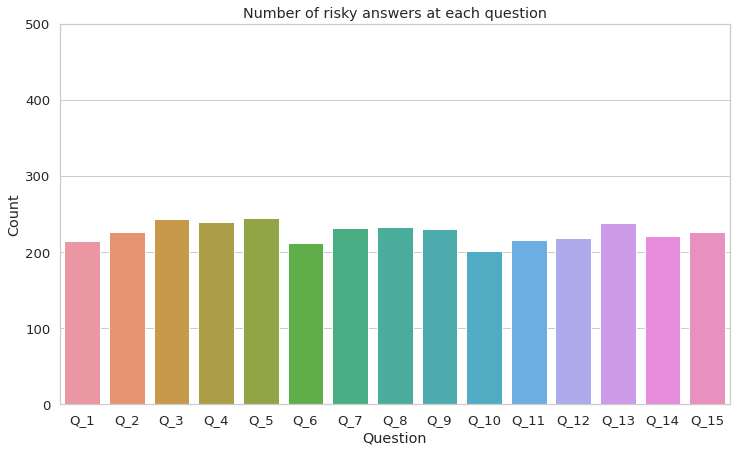

In [ ]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

sns.barplot(x=columns_names[:-1], y=questions)

plt.ylim(0,len(data_1))
plt.xlabel('Question')
plt.ylabel('Count')
plt.title('Number of risky answers at each question')
plt.show()

In [ ]:
data_sum = data_1.sum(axis=1)

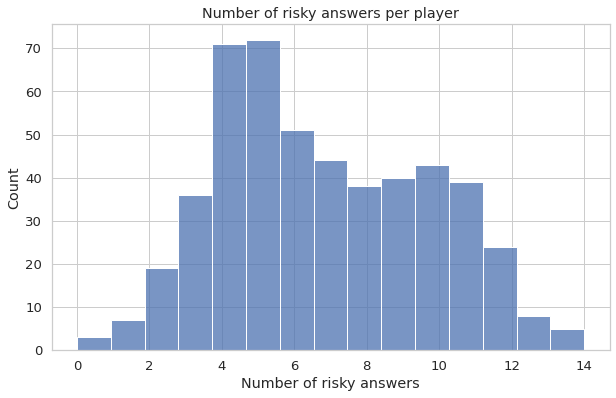

In [ ]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.histplot(data_sum, bins=n_questions)

plt.xlabel('Number of risky answers')
plt.ylabel('Count')
plt.title('Number of risky answers per player')
plt.show()

## Inference: Bayesian ITR Models

In [ ]:
!pip install --upgrade pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40.1 MB 53.1 MB/s 
     |████████████████████████████████| 1.1 MB 41.0 MB/s 
     |████████████████████████████████| 2.4 MB 48.1 MB/s 
     |████████████████████████████████| 91 kB 9.7 MB/s 
     |████████████████████████████████| 144 kB 43.6 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████████████| 271 kB 58.1 MB/s 
     |████████████████████████████████| 47 kB 5.0 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 2.19.1.1
    Uninstalling pystan-2.19.1.1:
      Successfully uninstalled pystan-2.19.1.1


In [ ]:
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
'''import stan

model_stan = """
data {
  int<lower=1> J;                     // number of students
  int<lower=1> K;                     // number of questions
  int<lower=1> N;                     // number of observations
  array[N] int<lower=1, upper=J> jj;  // student for observation n
  array[N] int<lower=1, upper=K> kk;  // question for observation n
  array[N] int<lower=0, upper=1> y;   // correctness for observation n
}

parameters {
  real delta;            // mean student ability
  array[J] real alpha;   // ability of student j - mean ability
  array[K] real beta;    // difficulty of question k
}

model {
  alpha ~ normal(0, 1); // informative true prior
  beta ~ normal(0, 1); // informative true prior
  delta ~ normal(.75, 1); // informative true prior
  for (n in 1 : N) {
    y[n] ~ bernoulli_logit(alpha[jj[n]] - beta[kk[n]] + delta);
  }
}
"""
n_obs = n_players * n_questions

# Create array jj
players_obs = []
for i in range(n_players):
  players_obs.extend([i+1]*n_questions)

# Create array kk
questions_obs = list(range(1, n_questions+1))
questions_obs = questions_obs*n_players

# Create arra y
answers_obs = data_1.values.flatten()

data_stan = {'J':n_players, 
             'K':n_questions, 
             'N':n_obs, 
             'jj':players_obs, 
             'kk':questions_obs,  
             'y':answers_obs}

posterior = stan.build(model_stan, data=data_stan)
fit = posterior.sample(num_chains=4, num_samples=1000)
#eta = fit["eta"]  # array with shape (8, 4000)

df = fit.to_frame()  # pandas `DataFrame, requires pandas
df.values'''

'import stan\n\nmodel_stan = """\ndata {\n  int<lower=1> J;                     // number of students\n  int<lower=1> K;                     // number of questions\n  int<lower=1> N;                     // number of observations\n  array[N] int<lower=1, upper=J> jj;  // student for observation n\n  array[N] int<lower=1, upper=K> kk;  // question for observation n\n  array[N] int<lower=0, upper=1> y;   // correctness for observation n\n}\n\nparameters {\n  real delta;            // mean student ability\n  array[J] real alpha;   // ability of student j - mean ability\n  array[K] real beta;    // difficulty of question k\n}\n\nmodel {\n  alpha ~ normal(0, 1); // informative true prior\n  beta ~ normal(0, 1); // informative true prior\n  delta ~ normal(.75, 1); // informative true prior\n  for (n in 1 : N) {\n    y[n] ~ bernoulli_logit(alpha[jj[n]] - beta[kk[n]] + delta);\n  }\n}\n"""\nn_obs = n_players * n_questions\n\n# Create array jj\nplayers_obs = []\nfor i in range(n_players):\n  pla

In [ ]:
import stan

model_stan = """
data {
  int<lower=1> J;                     // number of students
  int<lower=1> K;                     // number of questions
  int<lower=1> N;                     // number of observations
  array[N] int<lower=1, upper=J> jj;  // student for observation n
  array[N] int<lower=1, upper=K> kk;  // question for observation n
  array[N] int<lower=0, upper=1> y;   // correctness for observation n
}

parameters {
  array[J] real <lower=-10, upper=10> alpha;   // ability of student j
  array[K] real <lower=0, upper=1> beta;    // difficulty of question k
}

model {
  alpha ~ normal(0, 3); // informative true prior
  beta ~ beta(1, 1); // informative true prior
  for (n in 1 : N) {
    y[n] ~ bernoulli_logit(alpha[jj[n]] * beta[kk[n]]);
  }
}
"""

n_obs = n_players * n_questions

# Create array jj
players_obs = []
for i in range(n_players):
  players_obs.extend([i+1]*n_questions)

# Create array kk
questions_obs = list(range(1, n_questions+1))
questions_obs = questions_obs*n_players

# Create arra y
answers_obs = data_1.values.flatten()

data_stan = {'J':n_players, 
             'K':n_questions, 
             'N':n_obs, 
             'jj':players_obs, 
             'kk':questions_obs,  
             'y':answers_obs}

posterior = stan.build(model_stan, data=data_stan)
fit = posterior.sample(num_chains=4, num_samples=1000)
#eta = fit["eta"]  # array with shape (8, 4000)

df = fit.to_frame()  # pandas `DataFrame, requires pandas
df.values

Building...



Building: 43.6s, done.Messages from stanc:
Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   1% (101/8000)
Sampling:   2% (200/8000)
Sampling:   4% (300/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1901/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2101/8000)
Sampling:  28% (2201/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (2800/8000)
Sampling:  36% (2900/8000)
Sampling:  38% (3000/8000)
Sampling:  39% (3100/8000)
Sampling:  40% (3200/8000)
Sampling:  41% (3300/8000)
Sampling:  

array([[-4.17578728e+03,  8.78448424e-01,  2.55008577e-01, ...,
         1.47802928e-01,  1.93372472e-01,  4.26594940e-01],
       [-4.17698819e+03,  9.93715429e-01,  2.48257068e-01, ...,
         2.20648516e-01,  1.01022462e-01,  4.33903331e-01],
       [-4.15394340e+03,  8.94118455e-01,  2.33015798e-01, ...,
         2.97262556e-01,  2.23758423e-01,  3.09991648e-01],
       ...,
       [-4.14261519e+03,  8.21362153e-01,  2.48257068e-01, ...,
         1.80260790e-01,  1.75734727e-01,  3.98035909e-01],
       [-4.15483009e+03,  9.68674246e-01,  2.33015798e-01, ...,
         2.21073483e-01,  2.57304322e-01,  3.21726949e-01],
       [-4.16164930e+03,  8.37600608e-01,  2.48748073e-01, ...,
         2.01529798e-01,  1.63622962e-01,  3.46205013e-01]])

In [ ]:
df = fit.to_frame()  # pandas `DataFrame, requires pandas
df

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha.1,alpha.2,alpha.3,...,beta.6,beta.7,beta.8,beta.9,beta.10,beta.11,beta.12,beta.13,beta.14,beta.15
draws,,,,,,,,,,,,,,,,,,,,,
0,-4175.787279,0.878448,0.255009,4.0,15.0,0.0,4447.976665,-1.574328,3.448015,2.945644,...,0.349565,0.342998,0.134791,0.130402,0.235387,0.362104,0.672947,0.147803,0.193372,0.426595
1,-4176.988189,0.993715,0.248257,4.0,15.0,0.0,4454.997533,-0.948796,1.805018,3.701188,...,0.328421,0.207879,0.220071,0.192903,0.233274,0.490039,0.585324,0.220649,0.101022,0.433903
2,-4153.943400,0.894118,0.233016,4.0,15.0,0.0,4399.836873,-2.784797,0.614578,4.632343,...,0.361615,0.491842,0.144982,0.116256,0.358458,0.415458,0.585332,0.297263,0.223758,0.309992
3,-4177.533561,0.721869,0.248748,4.0,15.0,0.0,4424.788099,-1.718690,2.919796,2.300255,...,0.286562,0.300171,0.176492,0.115924,0.327564,0.390474,0.619154,0.218094,0.169083,0.273528
4,-4178.894419,0.935302,0.255009,4.0,15.0,0.0,4439.297615,-6.643107,2.299407,-0.175013,...,0.350202,0.213699,0.157799,0.128326,0.288461,0.398383,0.563548,0.185014,0.155925,0.330685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-4155.352899,0.965246,0.248748,4.0,15.0,0.0,4389.627494,-0.486592,0.882698,2.572260,...,0.242013,0.439211,0.188487,0.134843,0.253935,0.500812,0.556045,0.193000,0.205188,0.386183
3996,-4237.922497,0.930815,0.255009,4.0,15.0,0.0,4497.711050,-4.307351,-1.381933,-0.595631,...,0.162198,0.254440,0.096746,0.128687,0.242226,0.439860,0.588795,0.180454,0.163707,0.389915
3997,-4142.615192,0.821362,0.248257,4.0,15.0,0.0,4403.250660,-1.493321,3.781381,2.998020,...,0.363890,0.352147,0.187453,0.141709,0.235035,0.410555,0.673641,0.180261,0.175735,0.398036


In [ ]:
import arviz as az
data_arviz = az.convert_to_dataset(fit)
az.rhat(data_arviz)

<xarray.Dataset>
Dimensions:      (alpha_dim_0: 500, beta_dim_0: 15)
Coordinates:
  * alpha_dim_0  (alpha_dim_0) int64 0 1 2 3 4 5 6 ... 494 495 496 497 498 499
  * beta_dim_0   (beta_dim_0) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
Data variables:
    alpha        (alpha_dim_0) float64 1.002 0.9998 1.002 ... 1.002 1.001 1.001
    beta         (beta_dim_0) float64 1.001 1.002 1.001 ... 1.001 1.0 1.001

In [45]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[0],-3.185,1.680,-6.644,-0.297,0.026,0.025,4645.0,1800.0,1.0
alpha[1],2.462,1.584,-0.456,5.436,0.024,0.022,4593.0,2534.0,1.0
alpha[2],1.639,1.585,-1.331,4.575,0.022,0.025,5249.0,2476.0,1.0
alpha[3],-2.202,1.592,-5.035,0.863,0.024,0.027,5314.0,1963.0,1.0
alpha[4],-1.703,1.572,-4.578,1.389,0.021,0.022,5616.0,2589.0,1.0
...,...,...,...,...,...,...,...,...,...
beta[10],0.414,0.059,0.306,0.529,0.001,0.001,2379.0,3058.0,1.0
beta[11],0.599,0.085,0.433,0.751,0.002,0.002,1630.0,2182.0,1.0
beta[12],0.183,0.041,0.105,0.260,0.001,0.001,2981.0,2523.0,1.0
beta[13],0.185,0.041,0.114,0.269,0.001,0.001,2997.0,2909.0,1.0


### Results

In [ ]:
means_players = [df.iloc[250:,i].mean() for i in range(7,7+n_players)]

y_true = Dataset.iloc[:,-1]

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

max_metric = 0.00001
tau_1 = np.linspace(-2,2,50)
tau_2 = np.linspace(-2,2,50)

for t1 in tau_1:
  for t2 in tau_2:
    y_pred = []
    for pred in means_players:
      if pred < t1:
        y_pred.append('safe')
      elif t1 <= pred <= t2:
        y_pred.append('random')
      elif t2 < pred:
        y_pred.append('risky')
    # metric
    result = f1_score(y_true, y_pred, average='weighted')
    if result > max_metric:
      max_metric = result
      tau_1_best = t1
      tau_2_best = t2
      y_pred_best = y_pred

print(f'F1 Score = {max_metric}')
print(f'Matthews Corr. Coeficient = {matthews_corrcoef(y_true, y_pred_best)}')
print(f'Tau 1 best = {tau_1_best}')
print(f'Tau 2 best = {tau_2_best}')
print('')
print(classification_report(y_true, y_pred_best))

F1 Score = 0.7727119325277004
Matthews Corr. Coeficient = 0.6414321107503976
Tau 1 best = -1.1020408163265307
Tau 2 best = 0.7755102040816326

              precision    recall  f1-score   support

      random       0.49      0.45      0.47       105
       risky       0.78      0.88      0.83       145
        safe       0.88      0.86      0.87       250

    accuracy                           0.78       500
   macro avg       0.72      0.73      0.72       500
weighted avg       0.77      0.78      0.77       500



In [ ]:
'''from sklearn.metrics import log_loss

log_loss(y_true, probabilities)'''

'from sklearn.metrics import log_loss\n\nlog_loss(y_true, probabilities)'

In [ ]:
'''from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_pred_1, y_pred_2, y_true)'''

'from sklearn.metrics import cohen_kappa_score\n\ncohen_kappa_score(y_pred_1, y_pred_2, y_true)'

### Plots



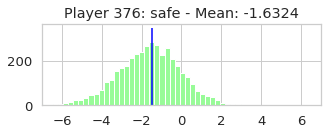

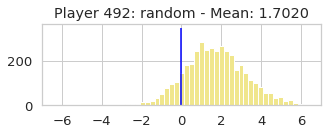

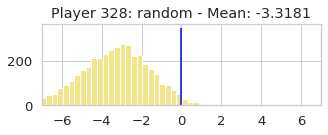

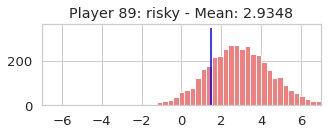

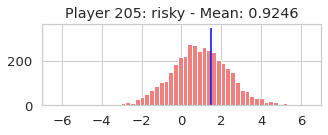

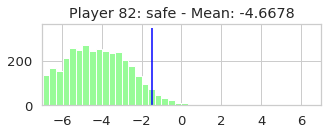

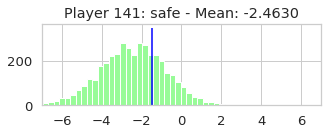

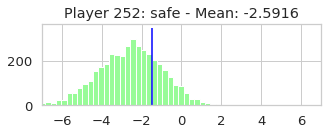

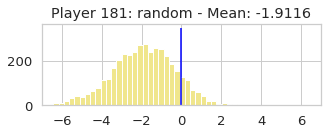

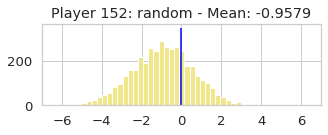

In [ ]:
players_plot = np.random.randint(1, 501, size=10)
for i in players_plot:
    # profile
    profile = Dataset.iloc[i,-1] 
    if profile == 'risky':
        color_hist = 'lightcoral'
        x_line = profiles_dict['risky']
    elif profile == 'random':
        color_hist = 'khaki'
        x_line = profiles_dict['random']
    elif profile == 'safe':
        color_hist = 'palegreen'
        x_line = profiles_dict['safe']
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([-7, 7])
    column_name = f'alpha.{i+1}'
    plt.hist(df[column_name], bins='auto', color=color_hist)
    plt.vlines(x=x_line, ymin=0, ymax=350, colors=['blue'])
    plt.title(f'Player {i}: {profile} - Mean: {df[column_name].mean():.4f}')
    plt.show()

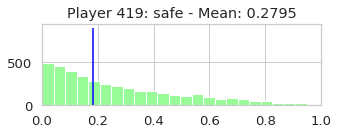

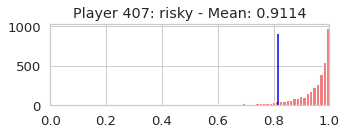

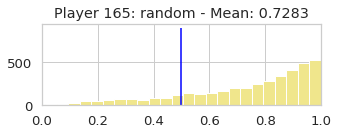

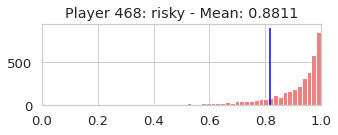

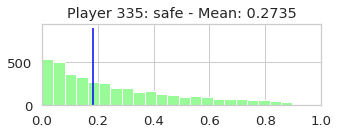

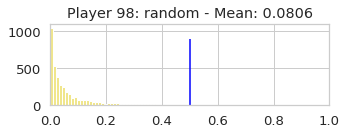

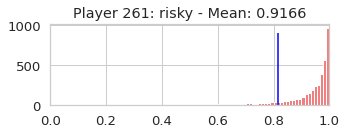

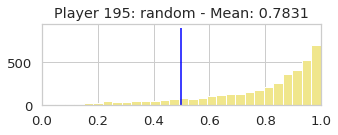

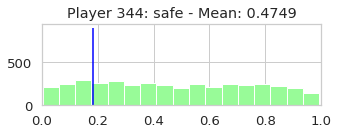

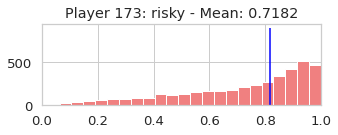

In [ ]:
# Expit
for i in players_plot:
    # profile
    profile = Dataset.iloc[i,-1] 
    if profile == 'risky':
        color_hist = 'lightcoral'
        x_line = expit(profiles_dict['risky'])
    elif profile == 'random':
        color_hist = 'khaki'
        x_line = expit(profiles_dict['random'])
    elif profile == 'safe':
        color_hist = 'palegreen'
        x_line = expit(profiles_dict['safe'])
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([0, 1])
    column_name = f'alpha.{i+1}'
    plt.hist(expit(df[column_name]), bins='auto', color=color_hist)
    plt.vlines(x=x_line, ymin=0, ymax=900, colors=['blue'])
    plt.title(f'Player {i}: {profile} - Mean: {expit(df[column_name]).mean():.4f}')
    plt.show()

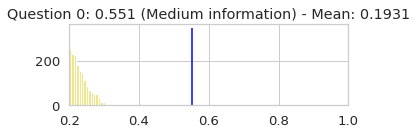

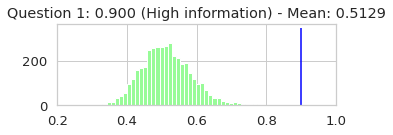

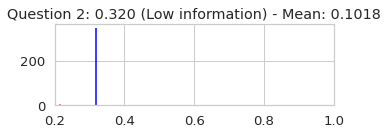

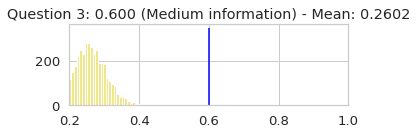

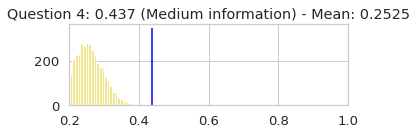

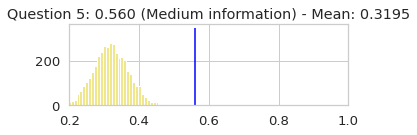

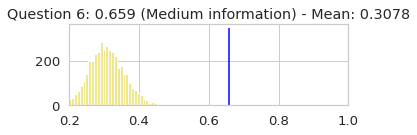

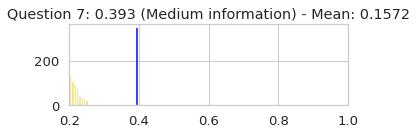

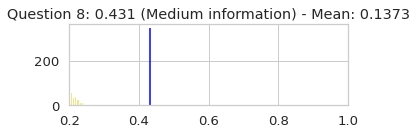

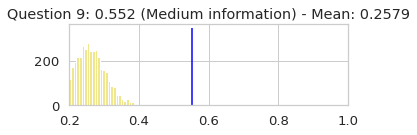

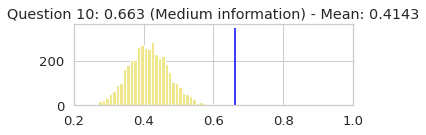

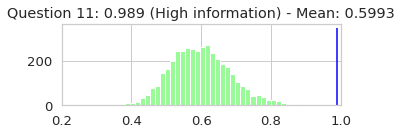

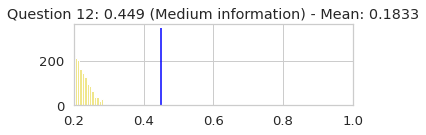

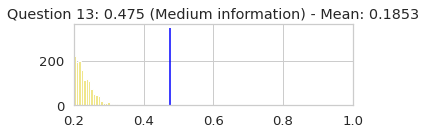

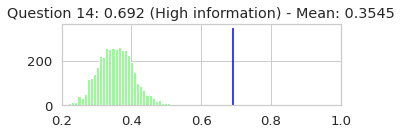

In [ ]:
for i in range(n_questions):
    # difficulty
    difficulty = game_1.difficulty_questions[i]
    if low_limit_question <= difficulty < (high_limit_question/3):
        diff_label = 'Low information'
        color_hist = 'lightcoral'
    elif (high_limit_question/3) <= difficulty < (2*high_limit_question/3):
        diff_label = 'Medium information'
        color_hist = 'khaki'
    elif (2*high_limit_question/3) <= difficulty < high_limit_question:
        diff_label = 'High information'
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([low_limit_question, high_limit_question])
    column_name = f'beta.{i+1}'
    plt.hist(df[column_name], bins='auto', color=color_hist)
    plt.vlines(x=game_1.difficulty_questions[i], ymin=0, ymax=350, colors=['blue'])
    plt.title(f'Question {i}: {difficulty:.3f} ({diff_label}) - Mean: {df[column_name].mean():.4f}')
    plt.show()